<img src="https://i.ibb.co/DWSqtc1/Encabezado.png" alt="descargar" border="0" width=900px>

# **Advertisind dataset**
 

<img src="https://i.ibb.co/SVwq8yr/publicidad.png" alt="descargar" border="0" height=50px>

_En este proyecto se propone el análisis de la [data](https://www.kaggle.com/ashydv/advertising-dataset) registrada en kaggle; buscamos **promover las ventas de un determinado producto** teniendo los siguientes datos: total de ventas de ese producto y gastos realizados en publicidad en los tres siguientes medios: TV, radio y periódico._

## IMPORTACIÓN DE LIBRERIAS

In [14]:
# Importacion de Librerias
import os # Para la lectura de nuestos archivos desde el computador
import pandas as pd # Manejo de data estructurada (Dataframe)
import matplotlib.pyplot as plt # Graficas
import seaborn as sns
import numpy as np

## RECOPILACIÓN DE LOS DATOS

In [15]:
# Importar los datos desde el repositorio
url_data = "https://raw.githubusercontent.com/MayumyCH/datasciencefem-datachallenge-monthly/main/advertisind_dataset/data/advertising.csv"
dataset = pd.read_csv(url_data,sep = ",")

In [16]:
dataset.shape
# INTERPRETACION:
# 200 observaciones
# 4 features/variables

(200, 4)

## TEORIA

**Regresion Lineal**

La Regresión es un modelo que nos permite estimar la relacion que existe entre una variable respuesta (y) y un conjunto de variables explicativas (x1, x2, x3, x4, x5 ...)

# RESOLUCIÓN

In [17]:
# CANTIDAD DE NULOS POR CADA FEATURE
dataset.isnull().sum()
# No poseen variables nulas

TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64

In [18]:
dataset.info()
# Todos los features son numericos

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [20]:
dataset.describe().T 
# dataset.describe(percentiles=[0.1,0.25,0.5,0.75,0.9])

,count,mean,std,min,25%,50%,75%,max
TV,200.0,147.0425,85.854236,0.7,74.375,149.75,218.825,296.4
Radio,200.0,23.2640,14.846809,0.0,9.975,22.90,36.525,49.6
Newspaper,200.0,30.5540,21.778621,0.3,12.750,25.75,45.100,114.0
Sales,200.0,15.1305,5.283892,1.6,11.000,16.00,19.050,27.0


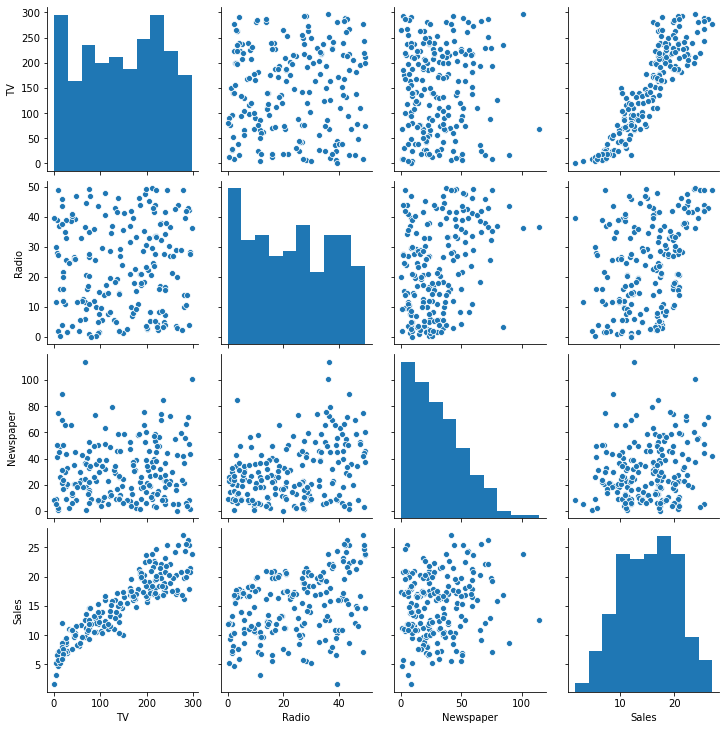

In [21]:
import seaborn as sns
# Diagrama de dispersion por pares usando Pairplots seaborn
sns.pairplot(dataset) 

<AxesSubplot:>

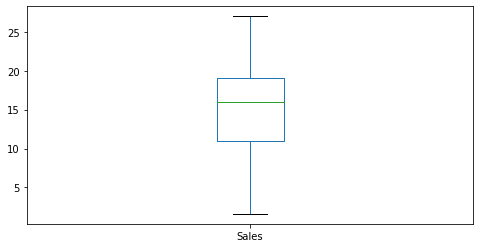

In [25]:
# Histograma
# dataset['Sales'].plot.hist(bins=25,figsize=(8,4))
# Densidad
#df['Price'].plot.density()

dataset['Sales'].plot.box(figsize=(8,4))

In [26]:
dataset.corr()

,TV,Radio,Newspaper,Sales
TV,1.000000,0.054809,0.056648,0.901208
Radio,0.054809,1.000000,0.354104,0.349631
Newspaper,0.056648,0.354104,1.000000,0.157960
Sales,0.901208,0.349631,0.157960,1.000000


<AxesSubplot:>

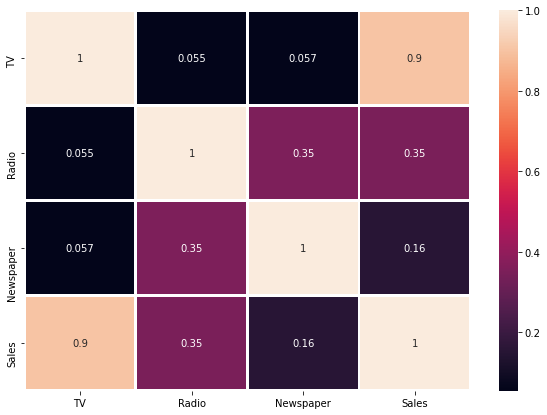

In [27]:
plt.figure(figsize=(10,7))
sns.heatmap(dataset.corr(),annot=True, linewidths=2)

## MODELADO

In [28]:
dataset.columns

Index(['TV', 'Radio', 'Newspaper', 'Sales'], dtype='object')

In [29]:
# Definimos la variable respuesta y la variable predictora
target = 'Sales'
predictoras = ['TV','Radio','Newspaper']

In [30]:
# Obtenemos del dataframe el conjunto de datos
X = dataset[predictoras]
y = dataset[target]

In [33]:
# Generamos el conjunto de train y tes gracias a sklearn
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=123)

In [34]:
# Importamos el Modelo de Regresion Lineal
from sklearn.linear_model import LinearRegression
# Importamos las metricas de la regresion
from sklearn import metrics
# Creamos el modelo de la regresion
lm = LinearRegression() # Creando un objeto de Regresión Lineal 'lm'

In [35]:
# Entrenamiento del modelo
lm.fit(X_train, y_train) # Ajuste el modelo lineal en el objeto 'lm' en sí, es decir, no es necesario establecer esto en otra variable

LinearRegression()

In [36]:
print("El término de intersección del modelo lineal:", lm.intercept_)
print("Los coeficientes del modelo lineal:", lm.coef_)

El término de intersección del modelo lineal: 4.51564392951426
Los coeficientes del modelo lineal: [ 0.05534747  0.10597291 -0.0022107 ]


In [37]:
# Predecimos la data de entrenamiento y la data del test
train_pred=lm.predict(X_train)
test_pred=lm.predict(X_test)

In [38]:
print("Valor del R cuadrado del train:", round(metrics.r2_score(y_train,train_pred), 2))
print("Valor del R cuadrado del test:", round(metrics.r2_score(y_test,test_pred), 2))

Valor del R cuadrado del train: 0.91
Valor del R cuadrado del test: 0.88


In [39]:
# Calculando los errores
print("Calculando el Error Absoluto Medio (MAE)")
print("MAE del Train:", metrics.mean_absolute_error(y_train,train_pred))
print("MAE del Test:", metrics.mean_absolute_error(y_test,test_pred))
print("\nCalculando el Error Cuadratico Medio (MSE)")
print("MAE del Train:", metrics.mean_squared_error(y_train,train_pred))
print("MAE del Test:", metrics.mean_squared_error(y_test,test_pred))
print("\nCalculando la Raiz del Error Absoluto Medio (RMSE)")
print("MAE del Train:", np.sqrt( metrics.mean_squared_error(y_train,train_pred)))
print("MAE del Test:", np.sqrt(metrics.mean_squared_error(y_test,test_pred)))

Calculando el Error Absoluto Medio (MAE)
MAE del Train: 1.1936564183895453
MAE del Test: 1.3798178433822117

Calculando el Error Cuadratico Medio (MSE)
MAE del Train: 2.4865354917870284
MAE del Test: 3.269502276931367

Calculando la Raiz del Error Absoluto Medio (RMSE)
MAE del Train: 1.5768752302534998
MAE del Test: 1.808176506022398


In [40]:
# Visualizamos el entrenamiento y la prediccion
prueba = pd.concat([X_train, y_train], axis = 1)
prueba['Precio_Predicho'] = train_pred
prueba.to_csv('Regresion_Lineal_Multiple.csv', index=False)

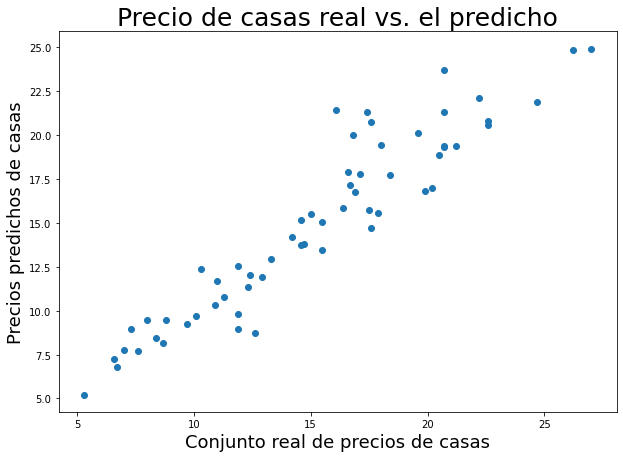

In [41]:
plt.figure(figsize=(10,7))
plt.title("Precio de casas real vs. el predicho",fontsize=25)
plt.xlabel("Conjunto real de precios de casas",fontsize=18)
plt.ylabel("Precios predichos de casas", fontsize=18)
plt.scatter(x=y_test,y=test_pred)

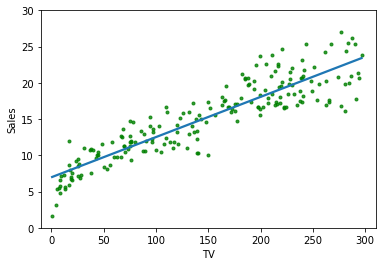

In [13]:
sns.regplot(dataset.TV, dataset.Sales, order=1, ci=None, scatter_kws={'color':'g', 's':9})   
# 's':9 denote the size of dots. 
plt.xlim(-10,310)                                                                 
plt.ylim(0,30)                                                                
# y axis values are start from 0 
#plt.ylim(bottom=0)
plt.show() 